In [112]:
# Developed by SinaSeifouri
# Github: SinaSOX
# Dataset: MNIST Dataset from sklearn

In [74]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import pandas as pd

In [75]:
data = load_digits()

In [76]:
print(data.data.shape)

(1797, 64)


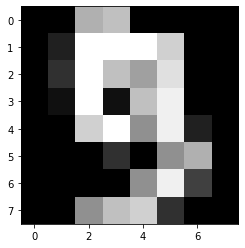

In [77]:
plt.gray()
plt.imshow(data.images[9],)

In [78]:
data.images[9]

array([[ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  2., 16., 16., 16., 13.,  0.,  0.],
       [ 0.,  3., 16., 12., 10., 14.,  0.,  0.],
       [ 0.,  1., 16.,  1., 12., 15.,  0.,  0.],
       [ 0.,  0., 13., 16.,  9., 15.,  2.,  0.],
       [ 0.,  0.,  0.,  3.,  0.,  9., 11.,  0.],
       [ 0.,  0.,  0.,  0.,  9., 15.,  4.,  0.],
       [ 0.,  0.,  9., 12., 13.,  3.,  0.,  0.]])

In [79]:
data.images.shape

(1797, 8, 8)

In [80]:
prep_data = data.images.reshape(1797,64)
prep_data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [81]:
y = data.target
y = pd.get_dummies(y)
y

,0,1,2,3,4,5,6,7,8,9
0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1792,0,0,0,0,0,0,0,0,0,1
1793,1,0,0,0,0,0,0,0,0,0
1794,0,0,0,0,0,0,0,0,1,0
1795,0,0,0,0,0,0,0,0,0,1


In [82]:
# Normilizing image pixels

In [83]:
from sklearn.preprocessing import MinMaxScaler

In [84]:
minmax_model = MinMaxScaler()

In [85]:
x = minmax_model.fit_transform(prep_data)

In [103]:
x.shape

(1797, 64)

In [87]:
# Train Test split

In [88]:
from sklearn.model_selection import train_test_split 

In [89]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=79)

In [90]:
model = tf.keras.models.Sequential()

In [91]:
model.add(tf.keras.layers.InputLayer(input_shape=64))

In [92]:
model.add(tf.keras.layers.Dense(50,activation='relu'))

In [93]:
model.add(tf.keras.layers.Dense(20,activation='relu'))

In [94]:
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [95]:
model.compile(optimizer='Adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics='CategoricalAccuracy')

In [96]:
model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test),batch_size=100)

Epoch 1/50
14/14 [==============================] - 1s 13ms/step - loss: 2.2397 - categorical_accuracy: 0.1656 - val_loss: 2.1150 - val_categorical_accuracy: 0.3489
Epoch 2/50
14/14 [==============================] - 0s 5ms/step - loss: 2.0339 - categorical_accuracy: 0.4432 - val_loss: 1.9193 - val_categorical_accuracy: 0.5200
Epoch 3/50
14/14 [==============================] - 0s 4ms/step - loss: 1.8224 - categorical_accuracy: 0.5969 - val_loss: 1.6977 - val_categorical_accuracy: 0.6222
Epoch 4/50
14/14 [==============================] - 0s 5ms/step - loss: 1.5900 - categorical_accuracy: 0.6778 - val_loss: 1.4612 - val_categorical_accuracy: 0.6622
Epoch 5/50
14/14 [==============================] - 0s 5ms/step - loss: 1.3484 - categorical_accuracy: 0.7454 - val_loss: 1.2326 - val_categorical_accuracy: 0.7578
Epoch 6/50
14/14 [==============================] - 0s 6ms/step - loss: 1.1292 - categorical_accuracy: 0.8144 - val_loss: 1.0298 - val_categorical_accuracy: 0.8156
Epoch 7/50
14/1

In [97]:
np.argmax(model.predict(np.array([x_test[54]])))

1/1 [==============================] - 0s 43ms/step


5

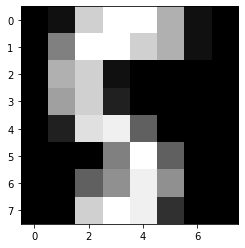

In [111]:
plt.imshow(minmax_model.inverse_transform(np.array([x_test[54]])).reshape(8,8))